<a href="https://colab.research.google.com/github/bstrain71/422_boston_housing/blob/master/Strain_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest

In [0]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import sklearn
import math
import sklearn.model_selection
import seaborn as sns
import matplotlib.pyplot as plt

# initial work with the smaller data set
df = pd.read_csv('https://raw.githubusercontent.com/bstrain71/422_boston_housing/master/boston.csv')


# remove neighborhood column IAW instructions
df = df.drop(columns=['neighborhood'])


## helper code - this is just to miminize

In [3]:
# Evaluate Regression Methods (Python)
# using data from the Studenmund's Restaurants case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# The original source shows how the data from the case
# might be analyzed using a simple linear model. 
# R and Python programs for analyzing the case study data 
# are provided in MDS_13_1.R and MDS_Extra_13_2.py, respectively.
# Data are in the comma-delimited text file studenmunds_restaurants.csv
# Under Python statsmodels we set up the model as follows:
# my_model = str('sales ~ competition + population + income')
# Code from this and other books by Miller is available at the
# GitHub site: https://github.com/mtpa/

# Here we use data from Studenmund's restaurants to evaluate
# regression modeling methods within a cross-validation design.
# We run the evaluation using a polynomial regression model 
# with each variable entered into the linear predictor in its
# raw and squared form. By using a polynomial form, we are 
# able to show possibilities for regularized regression.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation

# ---------------------------------------------------------
# read data for Studenmund's Restaurants
# creating data frame restdata
restdata = pd.read_csv('/content/studenmunds_restaurants.csv')

# check the pandas DataFrame object restdata
print('\nrestdata DataFrame (first and last five rows):')
print(restdata.head())
print(restdata.tail())

print('\nGeneral description of the restdata DataFrame:')
print(restdata.info())

# ensure that floats are used for the DataFrame
restdata.competition = pd.to_numeric(restdata.competition, downcast='float')
restdata.population = pd.to_numeric(restdata.population, downcast='float')
restdata.income = pd.to_numeric(restdata.income, downcast='float')
restdata.sales = pd.to_numeric(restdata.sales, downcast='float')

print('\nGeneral description of the restdata DataFrame:')
print(restdata.info())

print('\nDescriptive statistics of the restdata DataFrame:')
print(restdata.describe())

# add quadratic terms to the DataFrame, 
#     setting the stage for polynomial regression
# think of a model such as: sales ~ competition + population + income + 
#                                   competition2 + population2 + income2
# where 2s indicate the squared (quadratic) terms

# numpy functions to define new columns with quadratic terms
restdata['competition2'] = \
    np.multiply(restdata['competition'], restdata['competition'])
restdata['population2'] = \
    np.multiply(restdata['population'], restdata['population'])
restdata['income2'] = np.multiply(restdata['income'], restdata['income'])

# check the expanded pandas DataFrame object restdata
print('\nsoaps DataFrame (first and last five rows):')
print(restdata.head())
print(restdata.tail())

print('\nGeneral description of the restdata DataFrame:')
print(restdata.info())

print('\nDescriptive statistics of the restdata DataFrame:')
print(restdata.describe())

# set up preliminary data for data for fitting the models 
# the first column is sales response
# the remaining columns are the explanatory variables
# and functions of explanatory variables
prelim_model_data = np.array([restdata.sales,\
    restdata.competition,\
    restdata.population,\
    restdata.income,\
    restdata.competition2,\
    restdata.population2,\
    restdata.income2]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)

# --------------------------------------------------------
# specify the set of regression models being evaluated
# we set normalize=False because we have standardized
# the model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression']

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT, 
              normalize = False), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED)]
             
# tried adding Lasso and ElasticNet with little success
# these methods may have failed due to the small sample size 
# for the Studenmund's Restaurants case
# names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
#          'ElasticNet_Regression'] 

# regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
#               Ridge(alpha = 1, solver = 'cholesky', 
#                     fit_intercept = SET_FIT_INTERCEPT, 
#                     normalize = False, 
#                     random_state = RANDOM_SEED),
#               Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
#                     fit_intercept = SET_FIT_INTERCEPT, 
#                     random_state = RANDOM_SEED),
#               ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
#                          max_iter=10000, tol=0.01, 
#                          fit_intercept = SET_FIT_INTERCEPT, 
#                          normalize = False, 
#                          random_state = RANDOM_SEED)]

# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   










restdata DataFrame (first and last five rows):
    sales  competition  population  income
0  107919            3       65044   13240
1  118866            5      101376   22554
2   98579            7      124989   16916
3  122015            2       55249   20967
4  152827            3       73775   19576
     sales  competition  population  income
28  136749            7      233844   19200
29  105067            7       83416   22833
30  136872            6      183953   14409
31  117146            3       60457   20307
32  163538            2       65065   20111

General description of the restdata DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
sales          33 non-null int64
competition    33 non-null int64
population     33 non-null int64
income         33 non-null int64
dtypes: int64(4)
memory usage: 1.1 KB
None

General description of the restdata DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entr

## EDA

In [46]:


# i would like to predict the natural log vice the actual values
# this will make it easier to scale the data
#df['mv'] = np.log(df['mv'])

print(df.shape)
df.describe()

(506, 13)


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,3.034558
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,0.408275
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,1.609438
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,2.834680
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,3.054001
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,3.218876
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,3.912023


crim      -0.389582
zn         0.360386
indus     -0.484754
chas       0.175663
nox       -0.429300
rooms      0.696304
age       -0.377999
dis        0.249315
rad       -0.384766
tax       -0.471979
ptratio   -0.505655
lstat     -0.740836
mv         1.000000
Name: mv, dtype: float64


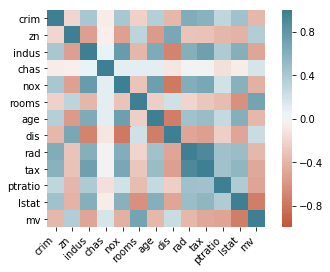

In [52]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

print(corr['mv'])

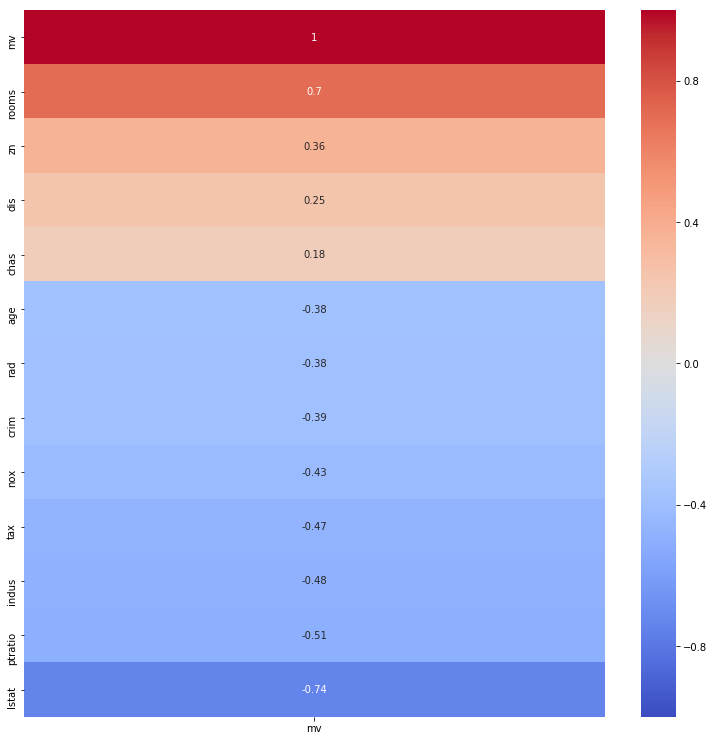

In [96]:
# correlations with mv - the response variable
# my personal cutoff is |0.4|

plt.figure(figsize=(13,13))
sns.heatmap(corr[['mv']].
            sort_values(by=['mv'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

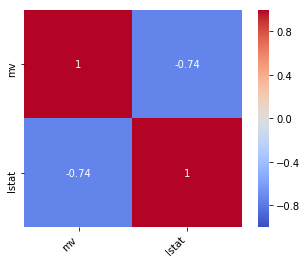

In [114]:
# correlation matrix with the top contenders for good predictive variables
mvp_corr = df[['mv','lstat']].corr()


ax = sns.heatmap(
    mvp_corr, 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Modeling

## Conclusion